In [6]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd

df = pd.read_excel (r'C:\Users\asus\Documents\Web Scraping for project\ipl_final_12Jan.xlsx')
df.drop(["Player", "Team"], axis=1, inplace=True)
df_array= np.array(df)
df_array

array([[4.0e+06, 1.6e+01, 1.6e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.6e+07, 1.6e+01, 1.6e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.1e+08, 1.3e+01, 1.3e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [2.0e+06, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.5e+07, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [7.5e+06, 0.0e+00, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00]])

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
X = scaler.fit_transform(df_array)
km = KMeans( n_clusters=3, init='random',n_init=10, tol=1e-04, max_iter=300, random_state=101)
y_km = km.fit_predict(X)


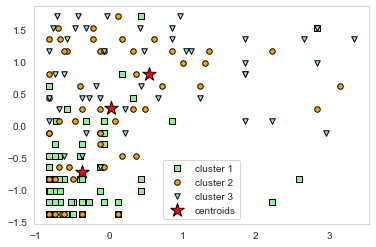

In [25]:
sns.set_style('whitegrid')
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=30, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=30, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=30, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=200, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()


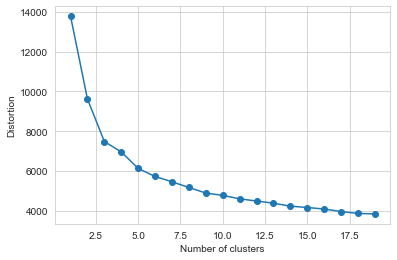

In [16]:
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

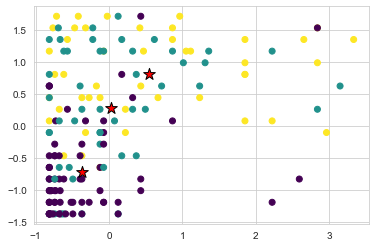

In [37]:
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], marker = '*', color='red', edgecolor = 'black', s=150)

In [26]:
y_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])